# Look at the positions of players when punts are recieved

In [1]:
import pandas as pd
import glob
from tqdm import tqdm
import numpy as np
import matplotlib.pylab as plt

import sys
sys.path.insert(0,'../scripts/')

from football_field import create_football_field

## Faircatch Positions

In [2]:
fc = pd.read_parquet('../working/position_at_faircatch.parquet')

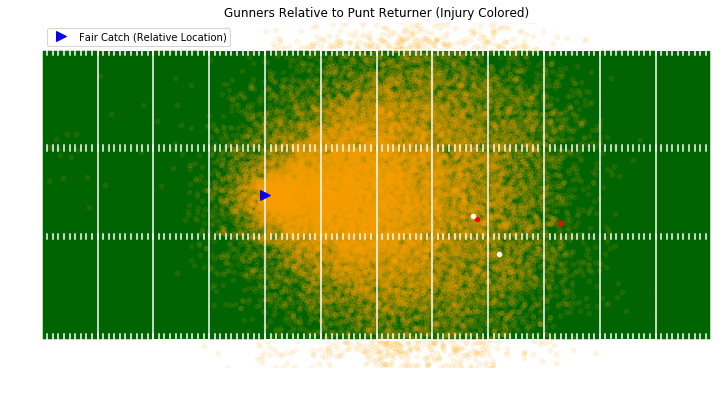

In [110]:
fig, ax = create_football_field(endzones=False, linenumbers=False)
fc['x_rel_left_to_right_plus40'] = fc['x_rel_left_to_right'] + 40
fc.plot(x='x_rel_left_to_right_plus40',
        y='y_rel_plus26',
        kind='scatter',ax=ax, alpha=0.1,
        title='All Players Relative to Faircatch',
        color='orange',
        zorder=2)
fc.loc[fc['injured_player']] \
    .plot(x='x_rel_left_to_right_plus40', y='y_rel_plus26', kind='scatter',ax=ax,
          alpha=1, title='Gunners Relative to Punt Returner (Injury Colored)', color='red', zorder=3)

fc.loc[fc['primary_partner_player']] \
    .plot(x='x_rel_left_to_right_plus40', y='y_rel_plus26', kind='scatter',ax=ax,
          alpha=1, title='Gunners Relative to Punt Returner (Injury Colored)', color='white', zorder=3)
caught_point = plt.plot(40, 26.65, '>', color='blue', markersize=10, zorder=5, label='Fair Catch (Relative Location)')

plt.legend(handles=caught_point)
plt.show()

## Punt Recieved Positions

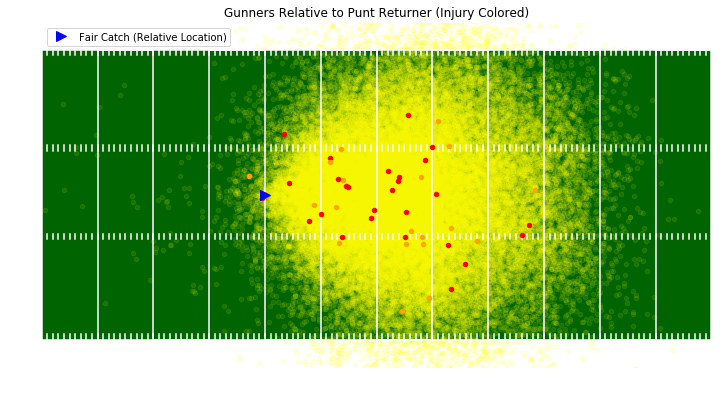

In [109]:
prec = pd.read_parquet('../working/position_at_punt_recieved.parquet')
fig, ax = create_football_field(endzones=False, linenumbers=False)
prec['y_rel_plus26'] = prec['y_rel'] + 26.65
prec['x_rel_left_to_right_plus40'] = prec['x_rel_left_to_right'] + 40
prec.plot(x='x_rel_left_to_right_plus40',
          y='y_rel_plus26',
          kind='scatter',
          ax=ax, alpha=0.1,
          title='All Players Relative to Punt Returned',
          color='yellow')
# Add injured and primary partners
prec.loc[prec['injured_player']] \
    .plot(x='x_rel_left_to_right_plus40', y='y_rel_plus26', kind='scatter',ax=ax,
          alpha=1, title='Gunners Relative to Punt Returner (Injury Colored)', color='red', zorder=3)
prec.loc[prec['primary_partner_player']] \
    .plot(x='x_rel_left_to_right_plus40', y='y_rel_plus26', kind='scatter',ax=ax,
          alpha=1, title='Gunners Relative to Punt Returner (Injury Colored)', color='orange', zorder=3)
caught_point = plt.plot(40, 26.65, '>', color='blue', markersize=10, zorder=5, label='Fair Catch (Relative Location)')
plt.legend(handles=caught_point)
plt.show()

# Punting Team Relative to Punt Returner (Fair Catch vs Returned)

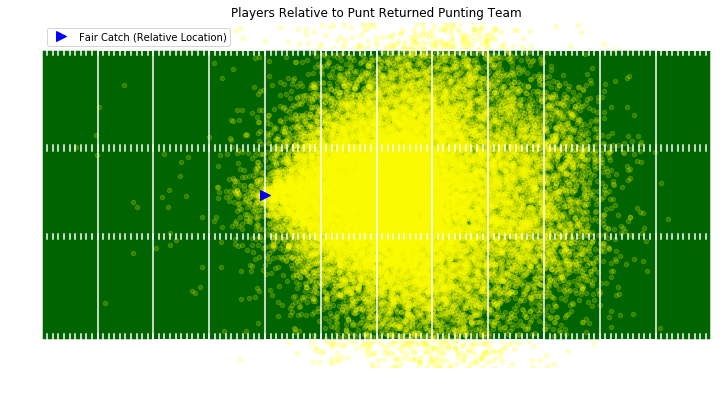

In [97]:
fig, ax = create_football_field(endzones=False, linenumbers=False)
prec['y_rel_plus26'] = prec['y_rel'] + 26.65
prec['x_rel_left_to_right_plus40'] = prec['x_rel_left_to_right'] + 40
prec.loc[prec['punting_returning_team'] == 'Punting_Team'] \
    .plot(x='x_rel_left_to_right_plus40', y='y_rel_plus26', kind='scatter',ax=ax,
          alpha=0.2, title='Players Relative to Punt Returned Punting Team', color='yellow')
caught_point = plt.plot(40, 26.65, '>', color='blue', markersize=10, zorder=5, label='Fair Catch (Relative Location)')
plt.legend(handles=caught_point)
plt.show()

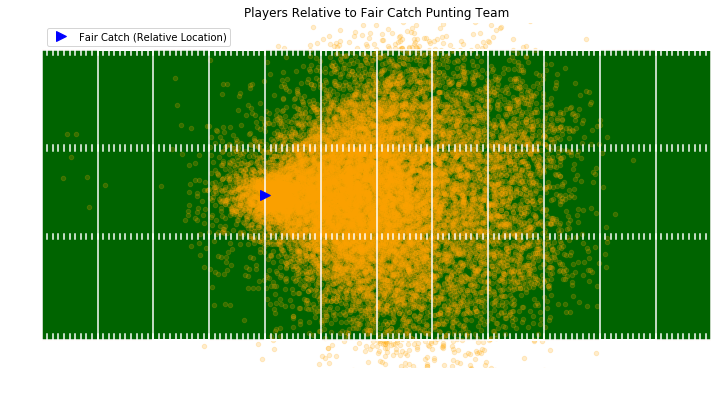

In [98]:
fig, ax = create_football_field(endzones=False, linenumbers=False)
fc['y_rel_plus26'] = fc['y_rel'] + 26.65

fc['x_rel_left_to_right_plus40'] = fc['x_rel_left_to_right'] + 40
fc.loc[fc['punting_returning_team'] == 'Punting_Team'] \
    .plot(x='x_rel_left_to_right_plus40', y='y_rel_plus26', kind='scatter',ax=ax,
          alpha=0.2, title='Players Relative to Fair Catch Punting Team', color='orange')
caught_point = plt.plot(40, 26.65, '>', color='blue', markersize=10, zorder=5, label='Fair Catch (Relative Location)')
plt.legend(handles=caught_point)
plt.show()

In [120]:
fc['distance_from_rec'] = np.sqrt(np.square(fc['x_rel']) + np.square(fc['y_rel']))
prec['distance_from_rec'] = np.sqrt(np.square(prec['x_rel']) + np.square(prec['y_rel']))

# Distance of Punting Team from Returner Fair Catch vs Returned

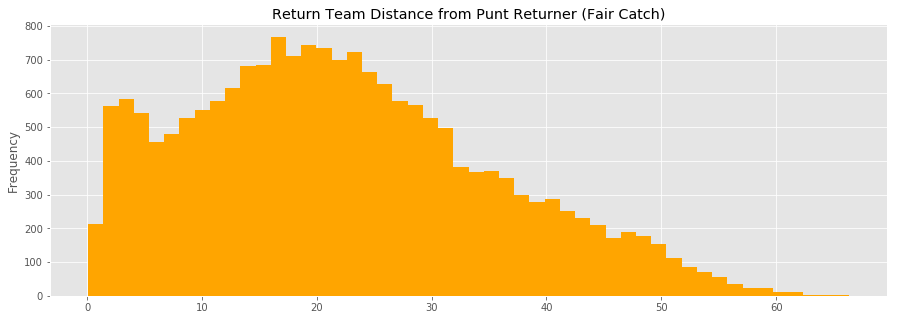

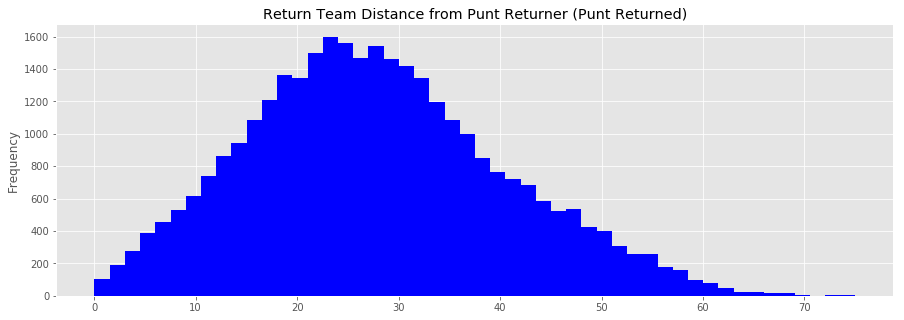

In [121]:
fc.loc[fc['punting_returning_team'] == 'Punting_Team']['distance_from_rec'].plot(kind='hist', figsize=(15,5), bins=50, title='Return Team Distance from Punt Returner (Fair Catch)', color='orange')
plt.show()

prec.loc[prec['punting_returning_team'] == 'Punting_Team']['distance_from_rec'].plot(kind='hist', figsize=(15,5), bins=50, title='Return Team Distance from Punt Returner (Punt Returned)', color='blue')
plt.show()

# Closest Player to Returner

In [122]:
fc_closest_player = fc.loc[fc['punting_returning_team'] == 'Punting_Team'].groupby(['season_year', 'gamekey', 'playid'])[['role','distance_from_rec']].min().reset_index()
prec_closest_player = prec.loc[prec['punting_returning_team'] == 'Punting_Team'].groupby(['season_year', 'gamekey', 'playid'])[['role','distance_from_rec']].min().reset_index()

In [123]:
fc_closest_player.groupby('role').count()

,season_year,gamekey,playid,distance_from_rec
role,,,,
GL,1661,1661,1661,1661
GLi,6,6,6,6
GR,5,5,5,5
GRi,1,1,1,1


In [124]:
prec_closest_player.groupby('role').count()

,season_year,gamekey,playid,distance_from_rec
role,,,,
GL,2879,2879,2879,2879
GLi,8,8,8,8
GR,19,19,19,19
GRi,8,8,8,8
P,5,5,5,5


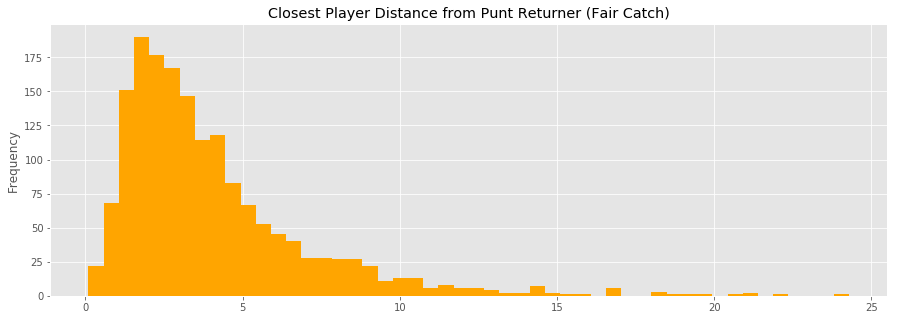

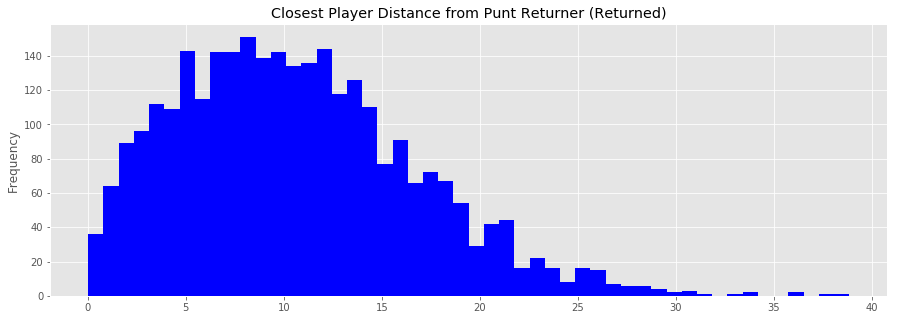

In [125]:
plt.style.use('ggplot')
fc_closest_player['distance_from_rec'].plot(kind='hist', figsize=(15,5), bins=50, title='Closest Player Distance from Punt Returner (Fair Catch)', color='orange')
plt.show()
prec_closest_player['distance_from_rec'].plot(kind='hist', figsize=(15,5), bins=50, title='Closest Player Distance from Punt Returner (Returned)', color='blue')
plt.show()

## All Gunner's Distance from Returner

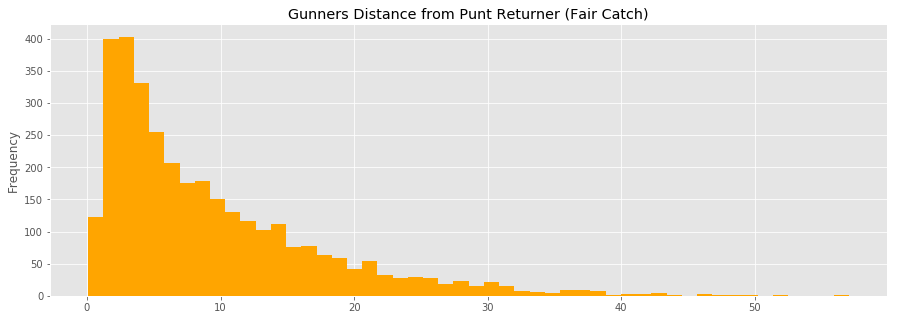

In [126]:
fc.loc[fc['role'].isin(['GL','GLi','GR','GRi'])]['distance_from_rec'] \
    .plot(kind='hist', figsize=(15,5), bins=50,
          title='Gunners Distance from Punt Returner (Fair Catch)', color='orange')
plt.show()

In [127]:
prec.columns

Index(['season_year', 'gamekey', 'playid', 'time', 'x', 'y', 'role', 'dis',
       'o', 'dir', 'event', 'position', 'injured_player',
       'primary_partner_player', 'left_to_right', 'punting_returning_team',
       'x_rel', 'y_rel', 'x_rel_left_to_right', 'y_rel_plus26',
       'x_rel_left_to_right_plus40', 'distance_from_rec'],
      dtype='object')

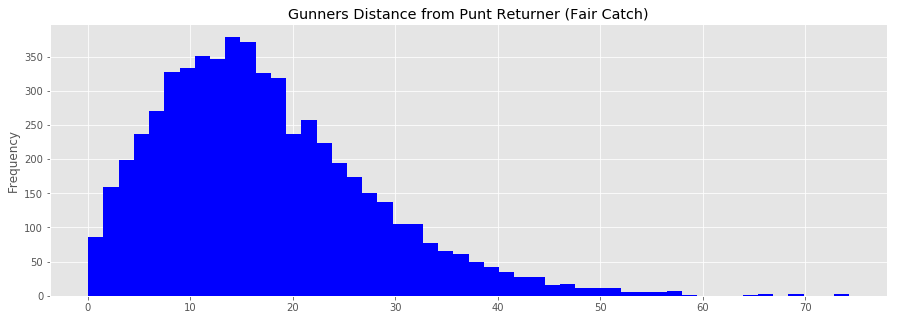

In [128]:
prec.loc[prec['role'].isin(['GL','GLi','GR','GRi'])]['distance_from_rec'] \
    .plot(kind='hist',
          figsize=(15,5),
          bins=50,
          title='Gunners Distance from Punt Returner (Fair Catch)', color='blue')
plt.show()

In [129]:
# Average distance of Gunner from Reciever on Fair Catch
fc.loc[fc['role'].isin(['GL','GLi','GR','GRi'])]['distance_from_rec'].mean()

9.27793658080118

In [130]:
# Average distance of Gnner from Reciever on Return
prec.loc[prec['role'].isin(['GL','GLi','GR','GRi'])]['distance_from_rec'].mean()

17.314709779415214

# Gunner Positions Relative to Punt Returner on Return

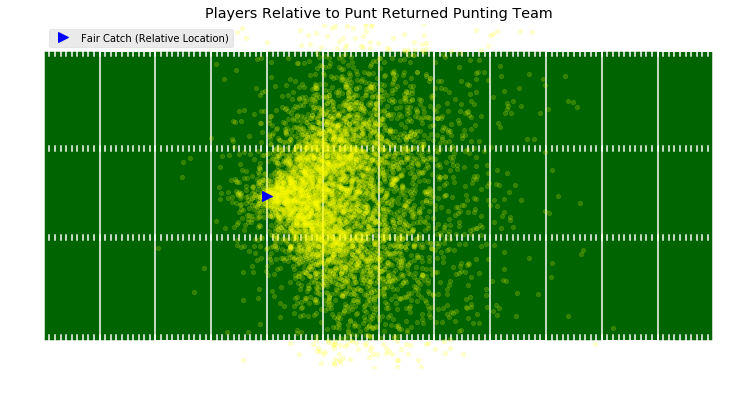

In [131]:
fig, ax = create_football_field(endzones=False, linenumbers=False)
prec['x_rel_left_to_right_plus40'] = prec['x_rel_left_to_right'] + 40
prec['y_rel_plus26'] = prec['y_rel'] + 26.65

prec.loc[prec['role'].isin(['GL','GLi','GR','GRi'])] \
    .plot(x='x_rel_left_to_right_plus40', y='y_rel_plus26', kind='scatter',ax=ax,
          alpha=0.2, title='Players Relative to Punt Returned Punting Team', color='yellow', zorder=3)
caught_point = plt.plot(40, 26.65, '>', color='blue', markersize=10, zorder=5, label='Fair Catch (Relative Location)')
plt.legend(handles=caught_point)
plt.show()

# Gunner Positions Relative to Punt Returner on Fair Catch

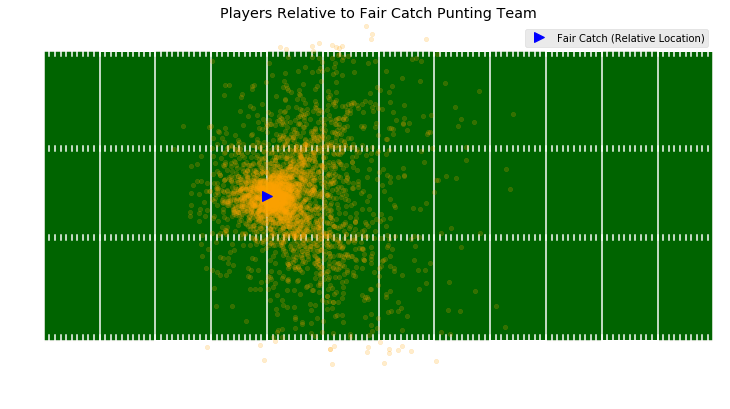

In [132]:
fig, ax = create_football_field(endzones=False, linenumbers=False)

fc['x_rel_left_to_right_plus40'] = fc['x_rel_left_to_right'] + 40
fc['y_rel_plus26'] = fc['y_rel'] + 26.65

fc['x_rel_left_to_right_plus40'] = fc['x_rel_left_to_right'] + 40
fc.loc[fc['role'].isin(['GL','GLi','GR','GRi'])] \
    .plot(x='x_rel_left_to_right_plus40', y='y_rel_plus26', kind='scatter',ax=ax,
          alpha=0.2, title='Players Relative to Fair Catch Punting Team', color='orange', zorder=3)
caught_point = plt.plot(40, 26.65, '>', color='blue', markersize=10, zorder=5, label='Fair Catch (Relative Location)')
plt.legend(handles=caught_point)
plt.show()

# Position of Gunners on Injury Plays

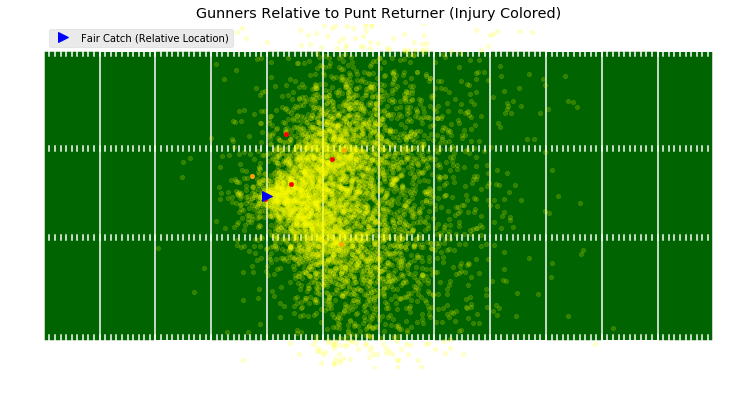

In [133]:
fig, ax = create_football_field(endzones=False, linenumbers=False)
prec['x_rel_left_to_right_plus40'] = prec['x_rel_left_to_right'] + 40
prec['y_rel_plus26'] = prec['y_rel'] + 26.65

prec.loc[prec['role'].isin(['GL','GLi','GR','GRi'])] \
    .plot(x='x_rel_left_to_right_plus40', y='y_rel_plus26', kind='scatter',ax=ax,
          alpha=0.2, title='Players Relative to Punt Returned Punting Team', color='yellow', zorder=3)
prec.loc[prec['role'].isin(['GL','GLi','GR','GRi']) & prec['injured_player']] \
    .plot(x='x_rel_left_to_right_plus40', y='y_rel_plus26', kind='scatter',ax=ax,
          alpha=1, title='Players Relative to Punt Returned Punting Team', color='red', zorder=3)
prec.loc[prec['role'].isin(['GL','GLi','GR','GRi']) & prec['primary_partner_player']] \
    .plot(x='x_rel_left_to_right_plus40', y='y_rel_plus26', kind='scatter',ax=ax,
          alpha=1, title='Gunners Relative to Punt Returner (Injury Colored)', color='orange', zorder=3)
caught_point = plt.plot(40, 26.65, '>', color='blue', markersize=10, zorder=5, label='Fair Catch (Relative Location)')
plt.legend(handles=caught_point)
plt.show()

# Punting Linemen Position on Returns
- We know that punting linemen are commonly involved in injuries on punting plays. Lets look at their position when fair catch or returns are made.

In [134]:
ri = pd.read_csv('../working/role_info.csv')

In [135]:
ri.loc[ri['generalized_role'] == 'Punting_Lineman']['role'].unique()

array(['PLG', 'PLT', 'PRG', 'PRT'], dtype=object)

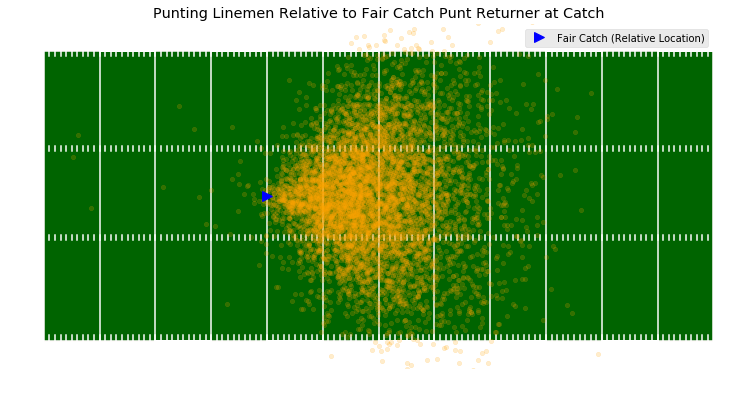

In [136]:
fig, ax = create_football_field(endzones=False, linenumbers=False)

fc['x_rel_left_to_right_plus40'] = fc['x_rel_left_to_right'] + 40
fc['y_rel_plus26'] = fc['y_rel'] + 26.65

fc['x_rel_left_to_right_plus40'] = fc['x_rel_left_to_right'] + 40
fc.loc[fc['role'].isin(['PLG', 'PLT', 'PRG', 'PRT'])] \
    .plot(x='x_rel_left_to_right_plus40', y='y_rel_plus26', kind='scatter',ax=ax,
          alpha=0.2, title='Punting Linemen Relative to Fair Catch Punt Returner at Catch', color='orange', zorder=3)
caught_point = plt.plot(40, 26.65, '>', color='blue', markersize=10, zorder=5, label='Fair Catch (Relative Location)')
plt.legend(handles=caught_point)
plt.show()

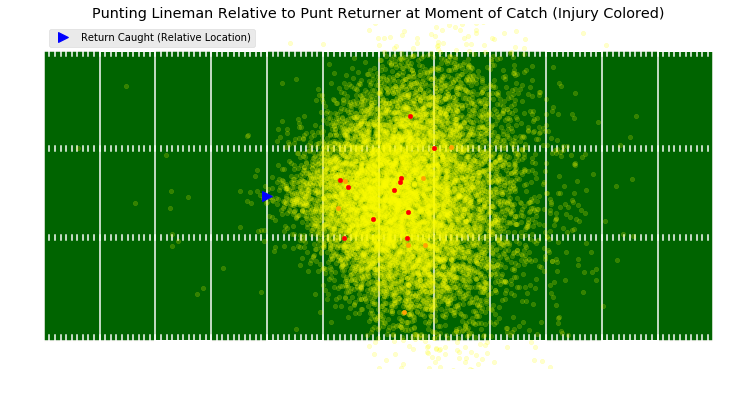

In [137]:
fig, ax = create_football_field(endzones=False, linenumbers=False)
prec['x_rel_left_to_right_plus40'] = prec['x_rel_left_to_right'] + 40
prec['y_rel_plus26'] = prec['y_rel'] + 26.65

prec.loc[prec['role'].isin(['PLG', 'PLT', 'PRG', 'PRT'])] \
    .plot(x='x_rel_left_to_right_plus40', y='y_rel_plus26', kind='scatter',ax=ax,
          alpha=0.2, title='Players Relative to Punt Returned Punting Team', color='yellow', zorder=3)
prec.loc[prec['role'].isin(['PLG', 'PLT', 'PRG', 'PRT']) & prec['injured_player']] \
    .plot(x='x_rel_left_to_right_plus40', y='y_rel_plus26', kind='scatter',ax=ax,
          alpha=1, title='Players Relative to Punt Returned Punting Team', color='red', label='injured gunners', zorder=3)
prec.loc[prec['role'].isin(['PLG', 'PLT', 'PRG', 'PRT']) & prec['primary_partner_player']] \
    .plot(x='x_rel_left_to_right_plus40', y='y_rel_plus26', kind='scatter',ax=ax,
          alpha=1, title='Punting Lineman Relative to Punt Returner at Moment of Catch (Injury Colored)', color='orange', zorder=3)
caught_point = plt.plot(40, 26.65, '>', color='blue', markersize=10, zorder=5, label='Return Caught (Relative Location)')
plt.legend(handles=caught_point)
plt.show()

# The punting team's lineman's position doesn't appear to impact the punt recievers choice to fair catch as much as the gunners position.

- What's the deal with punting linemen?